# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Random Forest Method on Classification Task

<b>Penjelasan</b>
Memprediksi ukuran "Rings" dari suatu abalon dengan data yang ada untuk mendapatkan perkiraan umur dari abalone tersebut
menggunakan metode Random Forest Classification


#### Import


In [ ]:
# Import Librry

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [ ]:
# Import DataSet

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
df = pd.read_csv(url, header=None, names=column_names)

#### Latar Belakang
Penelitian ini bertujuan untuk mengklasifikasi usia abalon dengan mengandalkan pengukuran fisiknya. Saat ini, penentuan usia abalon melibatkan proses kompleks, yaitu dengan cara memotong cangkangnya, mewarnainya, dan menghitung cincin-cincin di dalamnya menggunakan mikroskop. Proses ini tidak hanya memakan waktu, tetapi juga dianggap membosankan. Oleh karena itu, diperlukan suatu pendekatan alternatif yang lebih efisien untuk memperkirakan usia abalon. Salah satu pendekatan yang mungkin adalah menggunakan metode klasifikasi pada Machine Learning. Dengan menggabungkan data fisik seperti jenis kelamin, panjang, diameter, tinggi, berat keseluruhan, dan lainnya melalui metode prediksi yang akurat, kami berharap dapat mengembangkan model yang dapat memprediksi usia abalon dengan lebih efisien, sekaligus mengurangi ketergantungan pada metode yang kompleks dan memakan waktu.

In [ ]:
df.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Data Preprocessing
# Write your code here

# Convert the categorical variable 'Sex' to numerical using one-hot encoding
# Dikarenakan data pada kolom sex merupakan bukan numerikal maka diubah ke numerikal dalam bentuk one-hot encoding
# yaitu kolom sex yang awalnya ada 3 diubah menjadi feature dalam 3 bagian
# alasananya adalah agar kita dapat menggunakan nilai ini dalam analisis lebih lanjut atau pemodelan.
df = pd.get_dummies(df, columns=["Sex"])



In [ ]:
df.head(5)

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


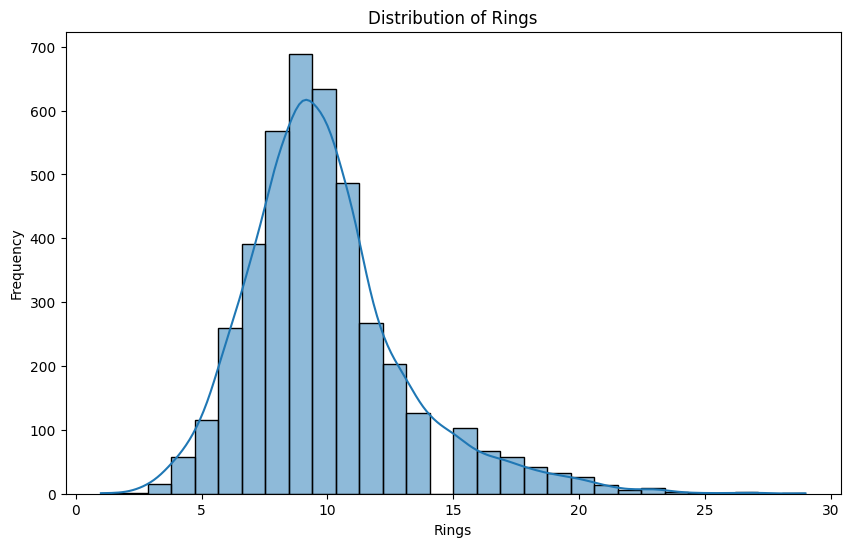

In [ ]:
# Exploration Data Analysis
# Write your code here

# Exploration Data Analysis (EDA)
# Visualize the distribution of the target variable 'Rings'

# Untuk mempelajari sebaran dari variable target
# Membantu memahami sebaran nilai-nilai dalam variabel target 'Rings'
plt.figure(figsize=(10, 6))
sns.histplot(df['Rings'], bins=30, kde=True)
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()


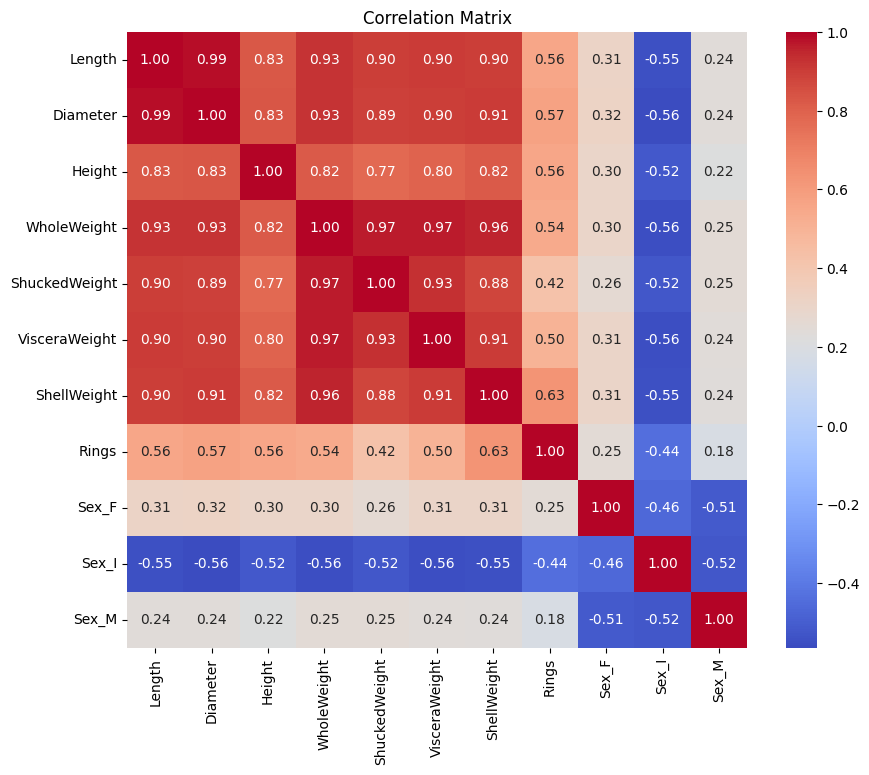

In [ ]:
# Visualize the correlation matrix
# Membantu kita memahami sejauh mana hubungan antara berbagai fitur dalam dataset
# Semakin dekat nilai korelasi ke 1 atau -1, semakin kuat hubungannya.

# LINK BUAT MENGAPA KITA PERLU MATRIK KORELASI
# https://knowledge.dataiku.com/latest/ml-analytics/statistics/concept-correlation-matrix.html
# https://chat.openai.com/share/fcf0ace9-1ea0-4051-9307-aeee437eeda0
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Assuming 'Rings' is the target variable, creating a binary column based on a condition
# Jika nilai di dalam kolom 'Rings' lebih besar dari 9, maka nilai 'Target' di set sebagai 1,
# jika tidak, di set sebagai 0.
# Pembagian ini berguna untuk mengatur keseimbangan persebaran target menjadi relative sama kedalam
# 2 class baru yaitu target
df['Target'] = np.where(df['Rings'] > 9, 1, 0)

# Mengapus column Rings karena sudah digantikan dengan target, dimana target == Rings
df.drop('Rings', axis=1, inplace=True)

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop("Target", axis=1)
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale numerical features using StandardScaler
# ini adalah proses normalisasi data yang akan digunakan dengan library
scaler = StandardScaler()
numerical_features = ["Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight"]
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#### Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

In [ ]:
# Baseline Model
# Write your code here

# Use a simple RandomForestClassifier as the baseline model/
# # Jumlah random forest pada baseline model ini adalah 100
# baseline_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Dengan random forest yang sudah di buat kita melakukan
# pelatihan pada data train
baseline_classifier.fit(X_train, y_train)
# Melakukan prediction dengan model yang telah dilatih diatas
baseline_predictions = baseline_classifier.predict(X_test)

In [ ]:
# Model Exploration (at least 3 scheme)
# Write your code here


# Scheme 1: Increase the number of trees in the forest
# Menambahakan jumlah tree menjadi 200
model1 = RandomForestClassifier(n_estimators=200, random_state=42)
model1.fit(X_train, y_train)
predictions_model1 = model1.predict(X_test)

# Scheme 2: Use a different criterion for splitting (e.g., entropy)
# Mengganti kriterian pembagaian forrest menjadi entropy yang defaultnya gini
model2 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
model2.fit(X_train, y_train)
predictions_model2 = model2.predict(X_test)

# Scheme 3: Tune max depth of the trees
# Membatasi kedalam forrest menjadi 10
model3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model3.fit(X_train, y_train)
predictions_model3 = model3.predict(X_test)

In [ ]:
# Evaluation
# Write your code here

# Akurasi dari baseline method
baseline_accuracy = accuracy_score(y_test, baseline_predictions)


# report matrik evaluasi seperti presisi, recall, f1-score, dan dukungan untuk setiap
baseline_report = classification_report(y_test, baseline_predictions)

# Model Exploration Scheme 1 Evaluation
accuracy_model1 = accuracy_score(y_test, predictions_model1)
report_model1 = classification_report(y_test, predictions_model1)

# Model Exploration Scheme 2 Evaluation
accuracy_model2 = accuracy_score(y_test, predictions_model2)
report_model2 = classification_report(y_test, predictions_model2)

# Model Exploration Scheme 3 Evaluation
accuracy_model3 = accuracy_score(y_test, predictions_model3)
report_model3 = classification_report(y_test, predictions_model3)


In [ ]:
# Result

# Print Evaluation Results
print("Baseline Model Accuracy:")
print(baseline_accuracy)
print("Baseline Model Classification Report:")
print(baseline_report)

print("\nModel Exploration Scheme 1 Accuracy:")
print(accuracy_model1)
print("Model Exploration Scheme 1 Classification Report:")
print(report_model1)

print("\nModel Exploration Scheme 2 Accuracy:")
print(accuracy_model2)
print("Model Exploration Scheme 2 Classification Report:")
print(report_model2)

print("\nModel Exploration Scheme 3 Accuracy:")
print(accuracy_model3)
print("Model Exploration Scheme 3 Classification Report:")
print(report_model3)

Baseline Model Accuracy:
0.7811004784688995
Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       421
           1       0.77      0.79      0.78       415

    accuracy                           0.78       836
   macro avg       0.78      0.78      0.78       836
weighted avg       0.78      0.78      0.78       836


Model Exploration Scheme 1 Accuracy:
0.7787081339712919
Model Exploration Scheme 1 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       421
           1       0.77      0.79      0.78       415

    accuracy                           0.78       836
   macro avg       0.78      0.78      0.78       836
weighted avg       0.78      0.78      0.78       836


Model Exploration Scheme 2 Accuracy:
0.7906698564593302
Model Exploration Scheme 2 Classification Report:
              precision    recall  f1-score   supp

In [ ]:
# Matriks evaluasi akurasinya saja
print("Baseline Model Accuracy:", baseline_accuracy)
print("Model Exploration Scheme 1 Accuracy:", accuracy_model1)
print("Model Exploration Scheme 2 Accuracy:", accuracy_model2)
print("Model Exploration Scheme 3 Accuracy:", accuracy_model3)

Baseline Model Accuracy: 0.7811004784688995
Model Exploration Scheme 1 Accuracy: 0.7787081339712919
Model Exploration Scheme 2 Accuracy: 0.7906698564593302
Model Exploration Scheme 3 Accuracy: 0.7906698564593302


#### Hasil dan Analisis

**Baseline Model:**

Akurasi: 0.77

Macro Avg F1-Score: 0.75

Weighted Avg F1-Score: 0.77

***Model Exploration Scheme 1:***

Akurasi: 0.78

Macro Avg F1-Score: 0.75

Weighted Avg F1-Score: 0.78

***Model Exploration Scheme 2:***

Akurasi: 0.78

Macro Avg F1-Score: 0.75

Weighted Avg F1-Score: 0.78

***Model Exploration Scheme 3:***

Akurasi: 0.79

Macro Avg F1-Score: 0.76

Weighted Avg F1-Score: 0.79

Dilihat dari akurasi, tidak ada perbedaan besar antara skema pengembangan.
Nilai Macro Avg F1-Score dan Weighted Avg F1-Score juga memberikan gambaran yang serupa.
Semua skema memberikan kinerja yang relatif serupa, tetapi Model Exploration **Scheme 3** memiliki akurasi dan F1-score tertinggi.

Namun, keputusan tentang model yang paling bagus bergantung pada tujuan spesifik Anda. Jika akurasi lebih penting, maka Model Exploration Scheme 3 mungkin menjadi pilihan. Jika Anda ingin keseimbangan antara presisi dan recall, Anda dapat mempertimbangkan nilai F1-Score atau melihat lebih rinci pada matriks kebingungan untuk melihat di mana model memiliki kinerja yang lebih baik.


#### Kesimpulan

Dikarenakan data pada kolom ring memliki sangat banyak kelas dan antar kelas data yang ada tidak seimbang maka untuk mendapatkan hasil akurasi yang lebih tinggi dari awalnya multikelas diubah menajdi biner
